In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Explore dataset

In [ ]:
import pandas as pd

In [ ]:
df_left = pd.read_csv("left_dataset.csv")
df_right = pd.read_csv("right_dataset.csv")

print(df_left.shape)
print(df_right.shape)

(94585, 7)
(91791, 7)


In [ ]:
# df_left.head()
df_left.sample(8)

,entity_id,name,address,city,state,postal_code,categories
63482,63483,The Wedding Chapel,8100 Frankford Ave,Philadelphia,PA,19136.0,"Party & Event Planning, Professional Services,..."
71838,71839,Casa Herrera,2755 E Lincoln Hwy,Thorndale,PA,19372.0,"Bars, Cocktail Bars, Restaurants, Mexican, Nig..."
69370,69371,Monticciolo Family & Sedation Dentistry - Tarp...,40668 US 19,Tarpon Springs,FL,34689.0,"Health & Medical, Dentists, General Dentistry,..."
17739,17740,Iron Hill Brewery TapHouse,260 Eagleview Blvd,Exton,PA,19341.0,"Food, Beer Bar, Burgers, Breweries, Restaurant..."
43157,43158,Time Out Lounge,6243 Allisonville Rd,Indianapolis,IN,46220.0,"Nightlife, Bars"
30387,30388,Souksavanh,1890 Almaville Rd,Smyrna,TN,37167.0,"Vietnamese, Food, Restaurants"
82558,82559,Popeyes Louisiana Kitchen,7115 Page Ave,Saint Louis,MO,63133.0,"American (Traditional), Restaurants, Fast Food..."
71005,71006,Pamfilios,12819 E New Market St,Carmel,IN,46032.0,"Restaurants, Italian"


In [ ]:
# df_right.head()
df_right.sample(8)

,business_id,name,address,city,state,zip_code,size
70148,70149,SUNSATIONAL SIGN & WINDOW TINTING,234 w Johnson Hwy,NORRISTOWN,PA,19401-3031,4.0
81141,81142,CARTER VINTAGE GUITARS LLC,625 8th Ave S,Nashville,TN,37203-4102,16.0
67534,67535,"NEWTOWN HARDWARE HOUSE, INC.",108 S State St,Newtown,PA,18940-1926,7.0
41852,41853,ZENO POWER SYSTEMS INC,24 SPOEDE LN,SAINT LOUIS,MO,63141-7708,3.0
36799,36800,THE TENDERLOIN GROUP LLC,232 N Kingshighway Blvd,Saint Louis,MO,63108-1276,25.0
22675,22676,CUSTOM CREATIONS KITCHENS AND MORE LLC,1641 Land O'Lakes Blvd,Lutz,FL,33549-2932,2.0
47487,47488,CHONG WAH RESTAURANT,4129 LINDELL BLVD,SAINT LOUIS,MO,63108-2913,6.0
1160,1161,COUNTRY PIZZA ITALIAN GRILL,14820 U.S. HIGHWAY 19 NORTH,CLEARWATER,FL,33764,31.0


In [ ]:
# col name
print(f"df_left columns: {list(df_left.columns)}")
print(f"df_right columns: {list(df_right.columns)}")

df_left columns: ['entity_id', 'name', 'address', 'city', 'state', 'postal_code', 'categories']
df_right columns: ['business_id', 'name', 'address', 'city', 'state', 'zip_code', 'size']


In [ ]:
# duplicate company id (the results show no duplicate id)
print(sum(df_left['entity_id'].duplicated()))
print(sum(df_right['business_id'].duplicated()))

0
0


# Data Cleaning

## Zip code

### df_left

In [ ]:
df_left["postal_code"].dtype

dtype('float64')

In [ ]:
# replace na with 0 in "postal_code"
df_left["postal_code"] = df_left["postal_code"].fillna(0)

In [ ]:
# convert df_left["postal_code"] to string due to leading and trailing 0s
df_left["zip_code_str"] = df_left["postal_code"].astype(int).astype(str)

# count the length of zip codes
df_left["zip_code_str"].map(len).value_counts()

5    94543
1       37
4        4
6        1
Name: zip_code_str, dtype: int64

In [ ]:
# examine row with zip code length of 6
df_left[df_left["zip_code_str"].map(len) == 6]

,entity_id,name,address,city,state,postal_code,categories,zip_code_str
65929,65930,Apna Kabab House,20323 Bruce B Downs Blvd,Tampa,FL,336140.0,"Restaurants, Indian, Halal, Pakistani",336140


In [ ]:
# change the above zip code to 33614 after varification based on city and state
df_left['zip_code_str'] = df_left['zip_code_str'].replace('336140', '33614')

In [ ]:
# fill the leading 0 in zip code
df_left["zip_code_str"] = df_left["zip_code_str"].str.zfill(5)

In [ ]:
# count the length of zip codes again, now all "zip_code_string" are 5 digit strings
df_left["zip_code_str"].map(len).value_counts()

5    94585
Name: zip_code_str, dtype: int64

### df_right

In [ ]:
df_right["zip_code"].dtype

dtype('O')

In [ ]:
df_right["zip_code"].map(len).value_counts()

10    61572
5     30209
7         9
9         1
Name: zip_code, dtype: int64

In [ ]:
# examine row with zip code length of 7
df_right[df_right["zip_code"].map(len) == 7]

,business_id,name,address,city,state,zip_code,size
6804,6805,SUNSHINE AGENTS CORPORATION,4114 Amber Lane,Palm Harbor,FL,34685--,4.0
16141,16142,RICHARD W OSBORNE PA,320 West Kennedy Boulevard,Tampa,FL,33606--,2.0
22566,22567,THE SHELL STORE LLC,8211 Ulmerton Road,Largo,FL,33771--,2.0
33369,33370,FIFTH AVE MANAGEMENT INC,2301 North Hawthorne Lane,Indianapolis,IN,46218--,4.0
47368,47369,LOOKS BY LISA,3010 Locust Street,St. Louis,MO,63103--,25.0
48579,48580,CRUZ'S MAGICAL NURSERY,1621 Rosado Drive,St. Louis,MO,63138--,5.0
69641,69642,"SUPER FENCE COMPANY, LLC",2717 Haverford Road,Ardmore,PA,19003--,6.0
76398,76399,ST JOHNS BAPTIST CHURCH,1232 Tasker Ave.,Philadelphia,PA,19148--,4.0
88756,88757,"GALLATIN MARKET , MADISON BP",3237 Gallatin Pike,Nashville,TN,37216--,4.0


In [ ]:
# remove trailing -- in zip_code
df_right['zip_code'] = df_right['zip_code'].apply(lambda x: x.replace('-', '') if len(x)==7 else x)

In [ ]:
# length of 10 are due to extended ZIP+4 code
df_right[df_right["zip_code"].map(len) == 10].sample(3)

,business_id,name,address,city,state,zip_code,size
26411,26412,SUPREME SHINE CLEANING SERVICES,2755 Curlew Rd Lot 110,Palm Harbor,FL,34684-4825,3.0
65576,65577,MAZE GROUP DEVELOPMENT INC,1910 Spring Garden St Ste 1,Philadelphia,PA,19130-4170,5.0
30858,30859,SEWARD ASSOCIATES LLC,3250 N Post Rd Ste 160,Indianapolis,IN,46226-6540,4.0


In [ ]:
# examine row with zip code length of 9 (maybe due to data entry error)
df_right[df_right["zip_code"].map(len) == 9]

,business_id,name,address,city,state,zip_code,size
21047,21048,SUNCOAST BAPTIST,6559 126th Avenue N,Largo,FL,33762-525,4.0


In [ ]:
# keep only the first five digit of 9/10-digit zip_code because df_left only contains 5 digits
# so it's no meaning to keep the extended digits
df_right['zip_code'] = df_right['zip_code'].apply(lambda x: x[:5] if len(x) in [9, 10] else x)

In [ ]:
# the zip_code column is clean now
df_right["zip_code"].map(len).value_counts()

5    91791
Name: zip_code, dtype: int64

## Convert all strings to lower case

In [ ]:
# Convert all strings to lower case
df_left = df_left.applymap(lambda s:s.lower() if type(s) == str else s)
df_right = df_right.applymap(lambda s:s.lower() if type(s) == str else s)

## Concat all address-related columns into one column 

In [ ]:
# Merge address, city, state, and postal_code into a single column
df_left['address_combined'] = df_left.apply(lambda row: ' '.join(row[['address', 'city', 'state']].astype(str)), axis=1)
df_right['address_combined'] = df_right.apply(lambda row: ' '.join(row[['address', 'city', 'state']].astype(str)), axis=1)

In [ ]:
df_left.drop(['postal_code','categories'], axis=1, inplace=True)
df_right.drop(['size'], axis=1, inplace=True)

In [ ]:
df_left.head()

,entity_id,name,address,city,state,zip_code_str,address_combined
0,1,the ups store,87 grasso plaza shopping center,affton,mo,63123,87 grasso plaza shopping center affton mo
1,2,st honore pastries,935 race st,philadelphia,pa,19107,935 race st philadelphia pa
2,3,perkiomen valley brewery,101 walnut st,green lane,pa,18054,101 walnut st green lane pa
3,4,sonic drive-in,615 s main st,ashland city,tn,37015,615 s main st ashland city tn
4,5,famous footwear,"8522 eager road, dierbergs brentwood point",brentwood,mo,63144,"8522 eager road, dierbergs brentwood point bre..."


In [ ]:
df_right.head()

,business_id,name,address,city,state,zip_code,address_combined
0,1,sourini painting inc.,12800 44th st n,clearwater,fl,33762,12800 44th st n clearwater fl
1,2,wolff dolla bill llc,1905 e 19th ave,tampa,fl,33605,1905 e 19th ave tampa fl
2,3,"comprehensive surgery center, llc","1988 gulf to bay blvd, ste 1",clearwater,fl,33765,"1988 gulf to bay blvd, ste 1 clearwater fl"
3,4,frank & adam apparel llc,13640 wright cir,tampa,fl,33626,13640 wright cir tampa fl
4,5,moreno plus transport inc,8608 huron court unite 58,tampa,fl,33614,8608 huron court unite 58 tampa fl


# Matching algorithm 

In [ ]:
# A sample
# copy from professor's example code in class 
#def match(left, right):
    
    # your algorithm here that computes the matches
    
    
#    matches = [
        # left_id, right_id, confidence score
#        [123, 567, 0.99]
#    ]
    
#    return matches

## inner join two dfs and see the perfect match (351 perfect match)

In [ ]:
# Merge address_combined and postal_code into a single column
df_left['address_combined_with_zip'] = df_left.apply(lambda row: ' '.join(row[['address_combined', 'zip_code_str']].astype(str)), axis=1)
df_right['address_combined_with_zip'] = df_right.apply(lambda row: ' '.join(row[['address_combined', 'zip_code']].astype(str)), axis=1)

In [ ]:
df_left.head()

In [ ]:
df_right.head()

In [ ]:
# inner join
df_perfect_match = pd.merge(df_left, df_right, on=['name', 'address_combined_with_zip'], how='inner')

cols = ["entity_id","business_id","name","address_combined_with_zip"]
df_perfect_match[cols]

In [ ]:
# number of perfect match
print(f"Number of perfect match: {len(df_perfect_match)}")

## Grouping & bucketing strategy - by zip code
https://www.kaggle.com/code/satishgunjal/fuzzy-record-matching-using-machine-learning#Introduction

In [ ]:
len(set(df_left["zip_code_str"]))

744

In [ ]:
len(set(df_right["zip_code"]))

459

In [ ]:
# count by zip code
counts_left = df_left["zip_code_str"].value_counts()
counts_left.head(10)

19103    1361
19107    1353
19147    1255
37203    1179
33511     940
46032     888
19106     851
33607     796
19104     777
37067     739
Name: zip_code_str, dtype: int64

In [ ]:
counts_right = df_right["zip_code"].value_counts()
counts_right.head(10)

37203    1258
37064    1139
19103    1051
37211    1028
33511     992
37067     886
33606     872
33614     871
19382     840
19107     821
Name: zip_code, dtype: int64

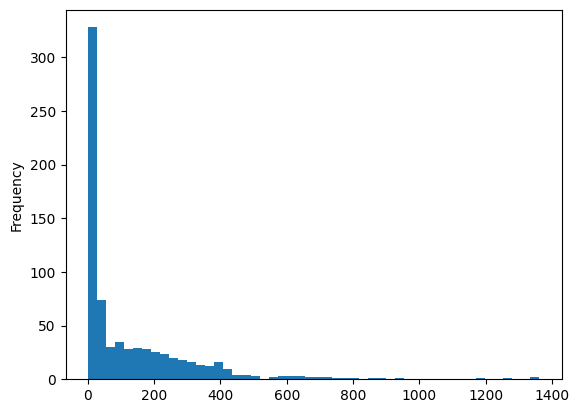

In [ ]:
import matplotlib.pyplot as plt

counts_left.plot(kind="hist", bins=50)
plt.show()

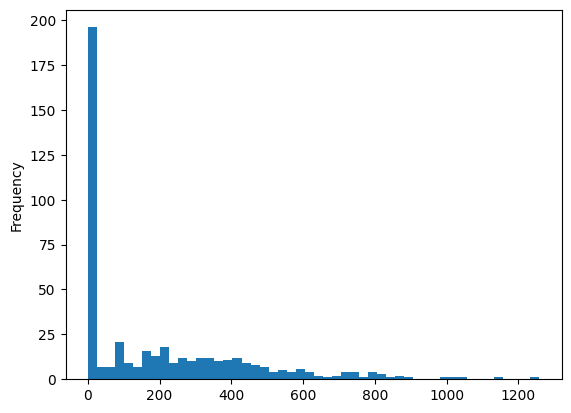

In [ ]:
counts_right.plot(kind="hist", bins=50)
plt.show()

In [ ]:
# left
print(f"There are {(counts_left > 500).sum()} zip codes with counts > 500.")
print(f"There are {(counts_left > 200).sum()} zip codes with counts > 200.")
print(f"There are {(counts_left > 100).sum()} zip codes with counts > 100.")
print(f"There are {(counts_left > 50).sum()} zip codes with counts > 50.")
print(f"There are {(counts_left > 5).sum()} zip codes with counts > 5.")
print(f"There are {(counts_left < 5).sum()} zip codes with counts < 5.")

In [ ]:
# right
print(f"There are {(counts_right > 500).sum()} zip codes with counts > 500.")
print(f"There are {(counts_right > 200).sum()} zip codes with counts > 200.")
print(f"There are {(counts_right > 100).sum()} zip codes with counts > 100.")
print(f"There are {(counts_right > 50).sum()} zip codes with counts > 50.")
print(f"There are {(counts_right > 5).sum()} zip codes with counts > 5.")
print(f"There are {(counts_right < 5).sum()} zip codes with counts < 5.")

### zip codes with counts > 200 (183 zip codes): match within its own group

In [ ]:
import difflib

# Define a function to calculate the matching score between two records
def calculate_matching_score(left_row, right_row):
    # Concatenate the relevant columns into a single string for each record
    left_string = left_row["name"] + left_row["address_combined"]
    right_string = right_row["name"] + right_row["address_combined"]
    
    # Calculate the matching score using the SequenceMatcher class from the difflib module
    matcher = difflib.SequenceMatcher(None, left_string.lower(), right_string.lower())
    return matcher.ratio()

In [ ]:
# zip codes in df_left with counts > 200
df_left_zip_codes_gt_200 = counts_left[counts_left > 200].index.tolist()

In [ ]:
# This code block takes 170 mins to run successfully
match_list = []

# Iterate over the zip codes
for zip_code in df_left_zip_codes_gt_200:
    if zip_code in counts_right.index:
        # Filter the rows in df_left and df_right by the zip code
        df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
        df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
        # Iterate over each pair of records
        for left_index, left_row in df_left_zip.iterrows():
            for right_index, right_row in df_right_zip.iterrows():
                # Calculate the matching score for this pair of records
                matching_score = calculate_matching_score(left_row, right_row)
                
                # add matching record to the list
                match_list.append((left_row['entity_id'], right_row['business_id'], matching_score))

In [ ]:
match_list[:20]

### zip codes with counts (100,200]: form one group

In [ ]:
# zip codes in df_left with counts 100-200
df_left_zip_codes_100_to_200 = counts_left[(counts_left > 100) & (counts_left <= 200)].index.tolist()

In [ ]:
# 11 mins
# Iterate over the zip codes
for zip_code in df_left_zip_codes_100_to_200:
    if zip_code in counts_right.index:
        # Filter the rows in df_left and df_right by the zip code
        df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
        df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
        # Iterate over each pair of records
        for left_index, left_row in df_left_zip.iterrows():
            for right_index, right_row in df_right_zip.iterrows():
                # Calculate the matching score for this pair of records
                matching_score = calculate_matching_score(left_row, right_row)
                
                # add matching record to the list
                match_list.append((left_row['entity_id'], right_row['business_id'], matching_score))

###  zip codes with counts (5,100]: form one group

In [ ]:
# zip codes in df_left with counts 5-100
df_left_zip_codes_5_to_100 = counts_left[(counts_left > 5) & (counts_left <= 100)].index.tolist()

In [ ]:
# 3 mins
# Iterate over the zip codes
for zip_code in df_left_zip_codes_5_to_100:
    if zip_code in counts_right.index:
        # Filter the rows in df_left and df_right by the zip code
        df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
        df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
        # Iterate over each pair of records
        for left_index, left_row in df_left_zip.iterrows():
            for right_index, right_row in df_right_zip.iterrows():
                # Calculate the matching score for this pair of records
                matching_score = calculate_matching_score(left_row, right_row)
                
                # add matching record to the list
                match_list.append((left_row['entity_id'], right_row['business_id'], matching_score))

### zip codes with counts (0,5]: form one group

In [ ]:
# zip codes in df_left with counts <=5
df_left_zip_codes_lt_5 = counts_left[counts_left <= 5].index.tolist()

In [ ]:
# only few seconds
# Iterate over the zip codes
for zip_code in df_left_zip_codes_lt_5:
    if zip_code in counts_right.index:
        # Filter the rows in df_left and df_right by the zip code
        df_left_zip = df_left[df_left["zip_code_str"] == zip_code]
        df_right_zip = df_right[df_right["zip_code"] == zip_code]
        
        # Iterate over each pair of records
        for left_index, left_row in df_left_zip.iterrows():
            for right_index, right_row in df_right_zip.iterrows():
                # Calculate the matching score for this pair of records
                matching_score = calculate_matching_score(left_row, right_row)
                
                # add matching record to the list
                match_list.append((left_row['entity_id'], right_row['business_id'], matching_score))

### Examine matching score

In [ ]:
# sort list in descending order
match_list.sort(key=lambda x: x[2], reverse=True)

In [ ]:
# examine match_list top 20
match_list[:20]

In [ ]:
# distribution of matching_score
import matplotlib.pyplot as plt

# Extract matching scores from the match_list
scores = [score for _, _, score in match_list]

# Plot a histogram of the scores
plt.hist(scores, bins=30)
plt.xlabel('Matching Score')
plt.ylabel('Frequency')
plt.title('Distribution of Matching Scores')
plt.show()

In [ ]:
# number of perfect match based on current algorithm is 351
perfect_matches = 0

for match in match_list:
    if match[2] == 1:
        perfect_matches += 1
        
print("Number of perfect matches:", perfect_matches)

The number of perfect match based on current algorithm is 351. The number of perfect match based on previous inner-join algorithm is also 351, partly proving that this algorithm is effective and meaningful.

### Output results to csv

In [ ]:
len(match_list)

In [ ]:
# filtering the list of tuples with matching_score > 0.8
match_list_gt_80pct = [(match[0], match[1], round(match[2], 2)) for match in match_list if match[2] > 0.8]
match_list_gt_80pct.sort(key=lambda x: x[2], reverse=True)

In [ ]:
len(match_list_gt_80pct)

In [ ]:
# export filtered list to a csv file
import csv

with open('matching score.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['entity_id', 'business_id', 'matching_score'])  # writing header row
    writer.writerows(match_list_gt_80pct)  # writing filtered tuples

In [ ]:
df_matching_score = pd.read_csv("matching score.csv")

In [ ]:
df_matching_score[1000:1020]

## FuzzyWuzzy

In [ ]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fuzzywuzzy import fuzz

In [ ]:
matches = []

for index1, row1 in df_left.iterrows():
    for index2, row2 in df_right.iterrows():
        name_similarity = fuzz.token_sort_ratio(row1['name'], row2['name'])
        address_similarity = fuzz.token_sort_ratio(row1['address_combined'], row2['address_combined'])
        zip_code_similarity = fuzz.token_sort_ratio(row1['zip_code_str'], row2['zip_code_str'])

        confidence = (0.3 * name_similarity + 0.4 * address_similarity + 0.3 * zip_code_similarity)/100
        count +=1

        if confidence > 0.8:
            matches.append((row1['name'], row2['name'], confidence))


print(matches)

NameError: ignored